### import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras


### Load Data

In [2]:
# Load the Fashion MNIST data
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load training and testing of Fashion MNIST data 
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

print("• Length of Train Images :",len(train_images))
print("• Length of Test Images :",len(test_images))

4431872/4422102 [==============================] - 0s 0us/step
• Length of Train Images : 60000
• Length of Test Images : 10000


### Explore Data

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

In [4]:
train_images.shape

(60000, 28, 28)

The labels are an array of integers, ranging from 0 to 9.

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Preprocess the data

In [6]:
# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# Reshape Images to put it in form DataDrame 
train_df = pd.DataFrame(train_images.reshape(len(train_images),-1))
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
label_train_df = pd.DataFrame(train_labels.reshape(len(train_images),1), columns=['Label'])
label_train_df.head()

,Label
0,9
1,0
2,0
3,3
4,0


In [11]:
list_labels_train = label_train_df['Label'].tolist()
#list_labels_train

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=45, random_state=123).fit_transform(train_df)
df_embd = pd.DataFrame(tsne, columns=['feature_1' ,'feature_2'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [35]:
df_embd

,feature_1,feature_2
0,26.220057,36.726971
1,33.985893,-38.811462
2,-10.829506,-24.845154
3,-1.033925,-29.334862
4,0.697248,-42.377762
...,...,...
59995,7.621485,22.070454
59996,-43.252392,-32.947300
59997,10.648862,-28.182037
59998,-4.877980,-15.191943


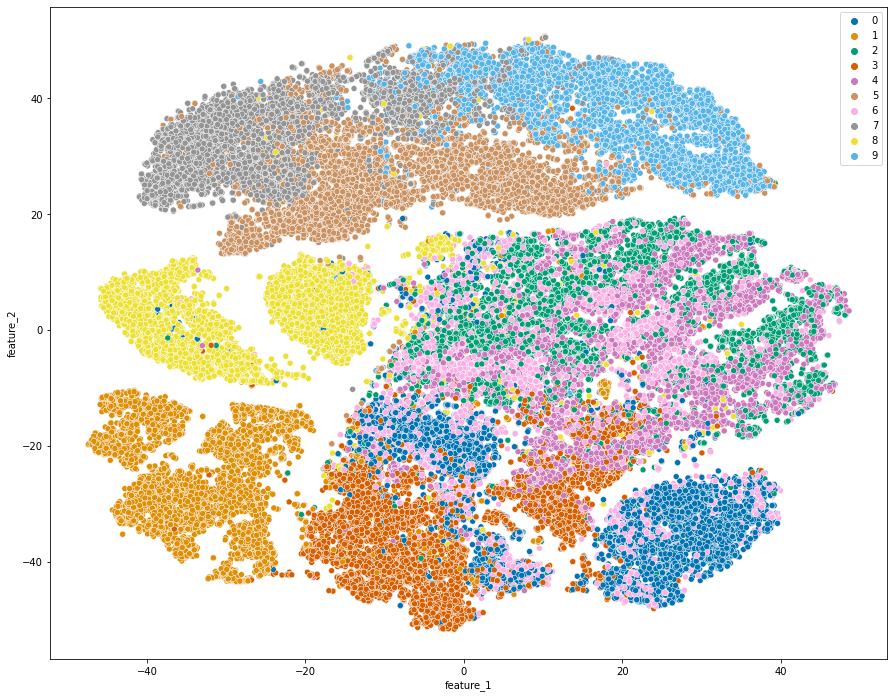

In [36]:
import seaborn as sns 
plt.figure(figsize=(15, 12))
#pal = sns.color_palette("hls",2)
sns.scatterplot(x = 'feature_1',
                y = 'feature_2',
                data = df_embd,
                hue = list_labels_train,
                palette='colorblind')
                #palette = pal)

We notice that there is overlapping between class (0, 2, 4, 6) --> (T-shirt, Pullover, Coat, Shirt), And we can say that these overlapping not strange to occur because these items sometimes have the similar shape.




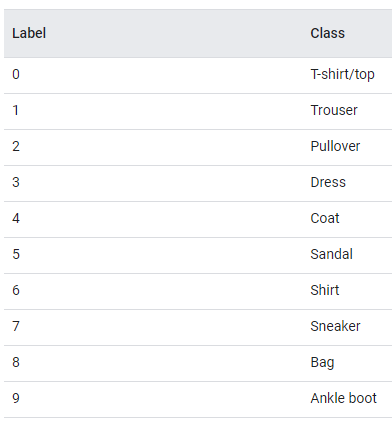

In [43]:
# Define Classes of Fashion
fmnist_classes = {0: 'T-Shirt',
                  1: 'Trouser',
                  2: 'Pullover',
                  3: 'Dress',
                  4: 'Coat',
                  5: 'Sandal',
                  6: 'Shirt',
                  7: 'Sneaker',
                  8: 'Bag',
                  9: 'Ankle Boot'}

•Label : 6

 •Image In Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0  75 135 110  70  59  81 136 154  90   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0   9 128 212 197 206 244 216 170 248 235 203 232 229 128   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 116 178 192 182 168 151 154 179 196 179 166 178 187 192 206 194  62   0   0   0   0   0]
 [  0   0   0   0   0  77 190 173 176 182 170 186 168 170 193 177 193 181 191 203 182 197 204   2   0   0   0   0]
 [  0   0   0   0   0 167 177 171 172 184 165 183 178 145 179 209 174 172 193 205 189 191 214 107   0   0   0   0]
 [  0   0   0   0   4 195 177 179 171 186 159 186 175 142 169 193 164 172 197 204 196 200 208 181   0   0   0   0]
 [  0   0   0   0  23 178 175 190 163 166 164 173 181 156 167 179 161 178 195 203 207 201 201 218   0   0   0   0]
 [  0   0   0   0  85 180 175 198 152 154 159 165 185 161 151 162 157 178 193 203 209 206 196 235  65   0   0   0]
 [  0   0   0   0 144 184 178 204 154 157 1

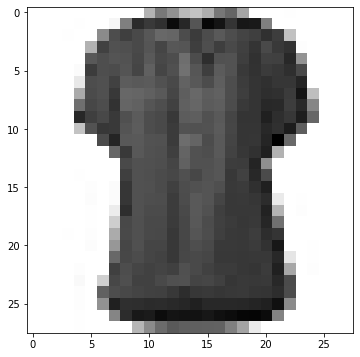

In [44]:
# Select sample from training data to show it

# You can put between 0 to 59999 here
index = 55

# print the label of the image
print('•Label :', train_labels[index])

# print image in pixels
print('\n •Image In Pixel Array:\n',train_images[index])

# Visualize the image
plt.figure(figsize=(10,6))
plt.imshow(train_images[index], cmap=plt.cm.binary)

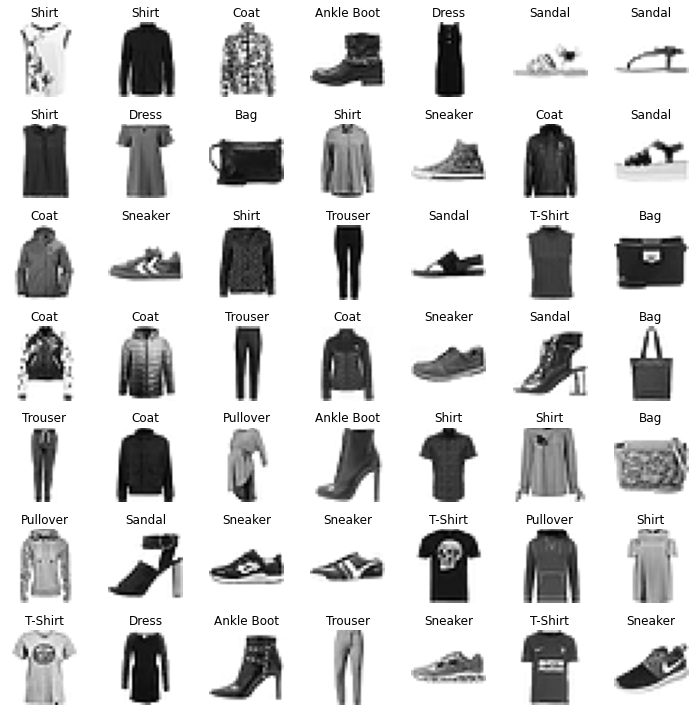

In [45]:

columns = 7
rows = 7
fig = plt.figure(figsize=(10, 10))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28, 28])
    label = fmnist_classes[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis('off')
plt.tight_layout()
plt.show()

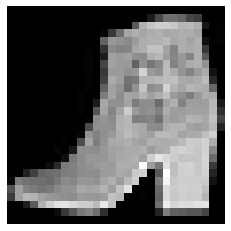

Index of Image : 33224
Target: Ankle Boot


In [46]:
idx = np.random.randint(len(train_images))
plt.imshow(np.squeeze(train_images[idx]), cmap='gray')
plt.axis('off')
plt.show()
print("Index of Image :",idx)
print("Target:", fmnist_classes[train_labels[idx]])

### Build Model

**• Simple Model**

In [54]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90): # Experiment with changing this value
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("• Model Training")
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

print("\n• Model Evaluation")
model.evaluate(test_images, test_labels)

• Model Training
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 4.0420 - accuracy: 0.7208
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6333 - accuracy: 0.7784
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5560 - accuracy: 0.8048
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5149 - accuracy: 0.8225
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4990 - accuracy: 0.8291

• Model Evaluation
313/313 [==============================] - 1s 1ms/step - loss: 0.5738 - accuracy: 0.7996


[0.5737557411193848, 0.7996000051498413]

We will use convolutions to make accuracy better. This is the same neural network as earlier, but this time with Convolution and MaxPooling layers added first

In [55]:
# Define the model
model = tf.keras.models.Sequential([

  # Convolution Part
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2, 2),
  # Neural Network Part                                    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Model Training")
model.fit(train_images, train_labels, epochs=5)

print("Model Evaluation")
model.evaluate(test_images, test_labels)

Model Training
Epoch 1/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.5907 - accuracy: 0.8210
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3373 - accuracy: 0.8756
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2961 - accuracy: 0.8906
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2683 - accuracy: 0.8995
Epoch 5/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2477 - accuracy: 0.9073
Model Evaluation
313/313 [==============================] - 6s 17ms/step - loss: 0.3275 - accuracy: 0.8864


[0.32747265696525574, 0.8863999843597412]

In [56]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#### **Make Predictions:**
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [57]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [65]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

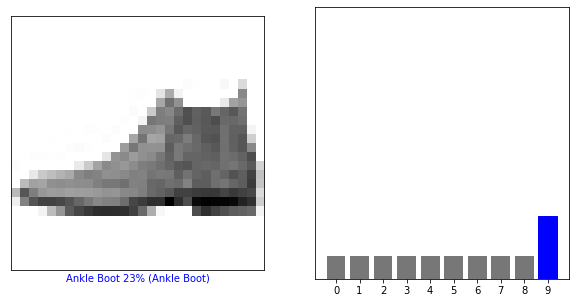

In [66]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

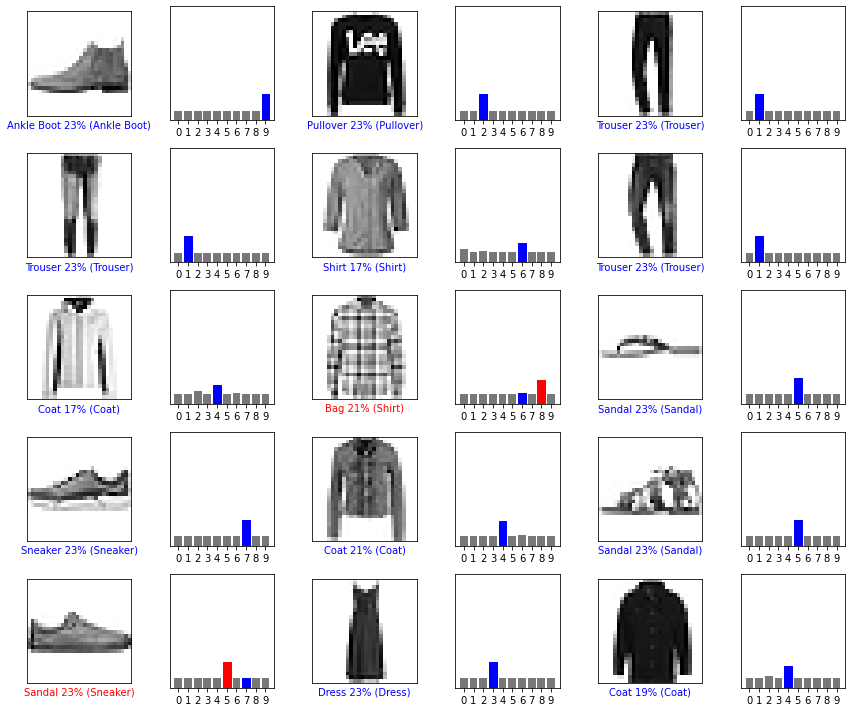

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()